# Evo-Devo application from MEFISTO paper

https://github.com/bioFAM/MEFISTO_tutorials/blob/master/MEFISTO_evodevo.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

import warnings

import torch
from data_loader import load_mefisto_evodevo

from prismo.prismo import PRISMO, DataOptions, ModelOptions, SmoothOptions, TrainingOptions
from prismo.plotting import (
    plot_factors_covariate_1d,
    plot_factors_scatter,
    plot_gps_1d,
    plot_smoothness,
    plot_top_weights,
    plot_training_curve,
    plot_variance_explained,
)
from prismo.io import load_model

warnings.simplefilter(action="ignore", category=FutureWarning)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
data = load_mefisto_evodevo()

2024-10-30 11:45:51 | prismo.prismo | INFO | Setting up device...
INFO:prismo.prismo:Setting up device...
2024-10-30 11:45:51 | prismo.prismo | INFO | - No likelihoods provided. Inferring likelihoods from data.
INFO:prismo.prismo:- No likelihoods provided. Inferring likelihoods from data.


2024-10-30 11:45:51 | prismo.prismo | INFO |   - Brain: Normal
INFO:prismo.prismo:  - Brain: Normal
2024-10-30 11:45:51 | prismo.prismo | INFO |   - Cerebellum: Normal
INFO:prismo.prismo:  - Cerebellum: Normal
2024-10-30 11:45:51 | prismo.prismo | INFO |   - Heart: Normal
INFO:prismo.prismo:  - Heart: Normal
2024-10-30 11:45:51 | prismo.prismo | INFO |   - Liver: Normal
INFO:prismo.prismo:  - Liver: Normal
2024-10-30 11:45:51 | prismo.prismo | INFO |   - Testis: Normal
INFO:prismo.prismo:  - Testis: Normal


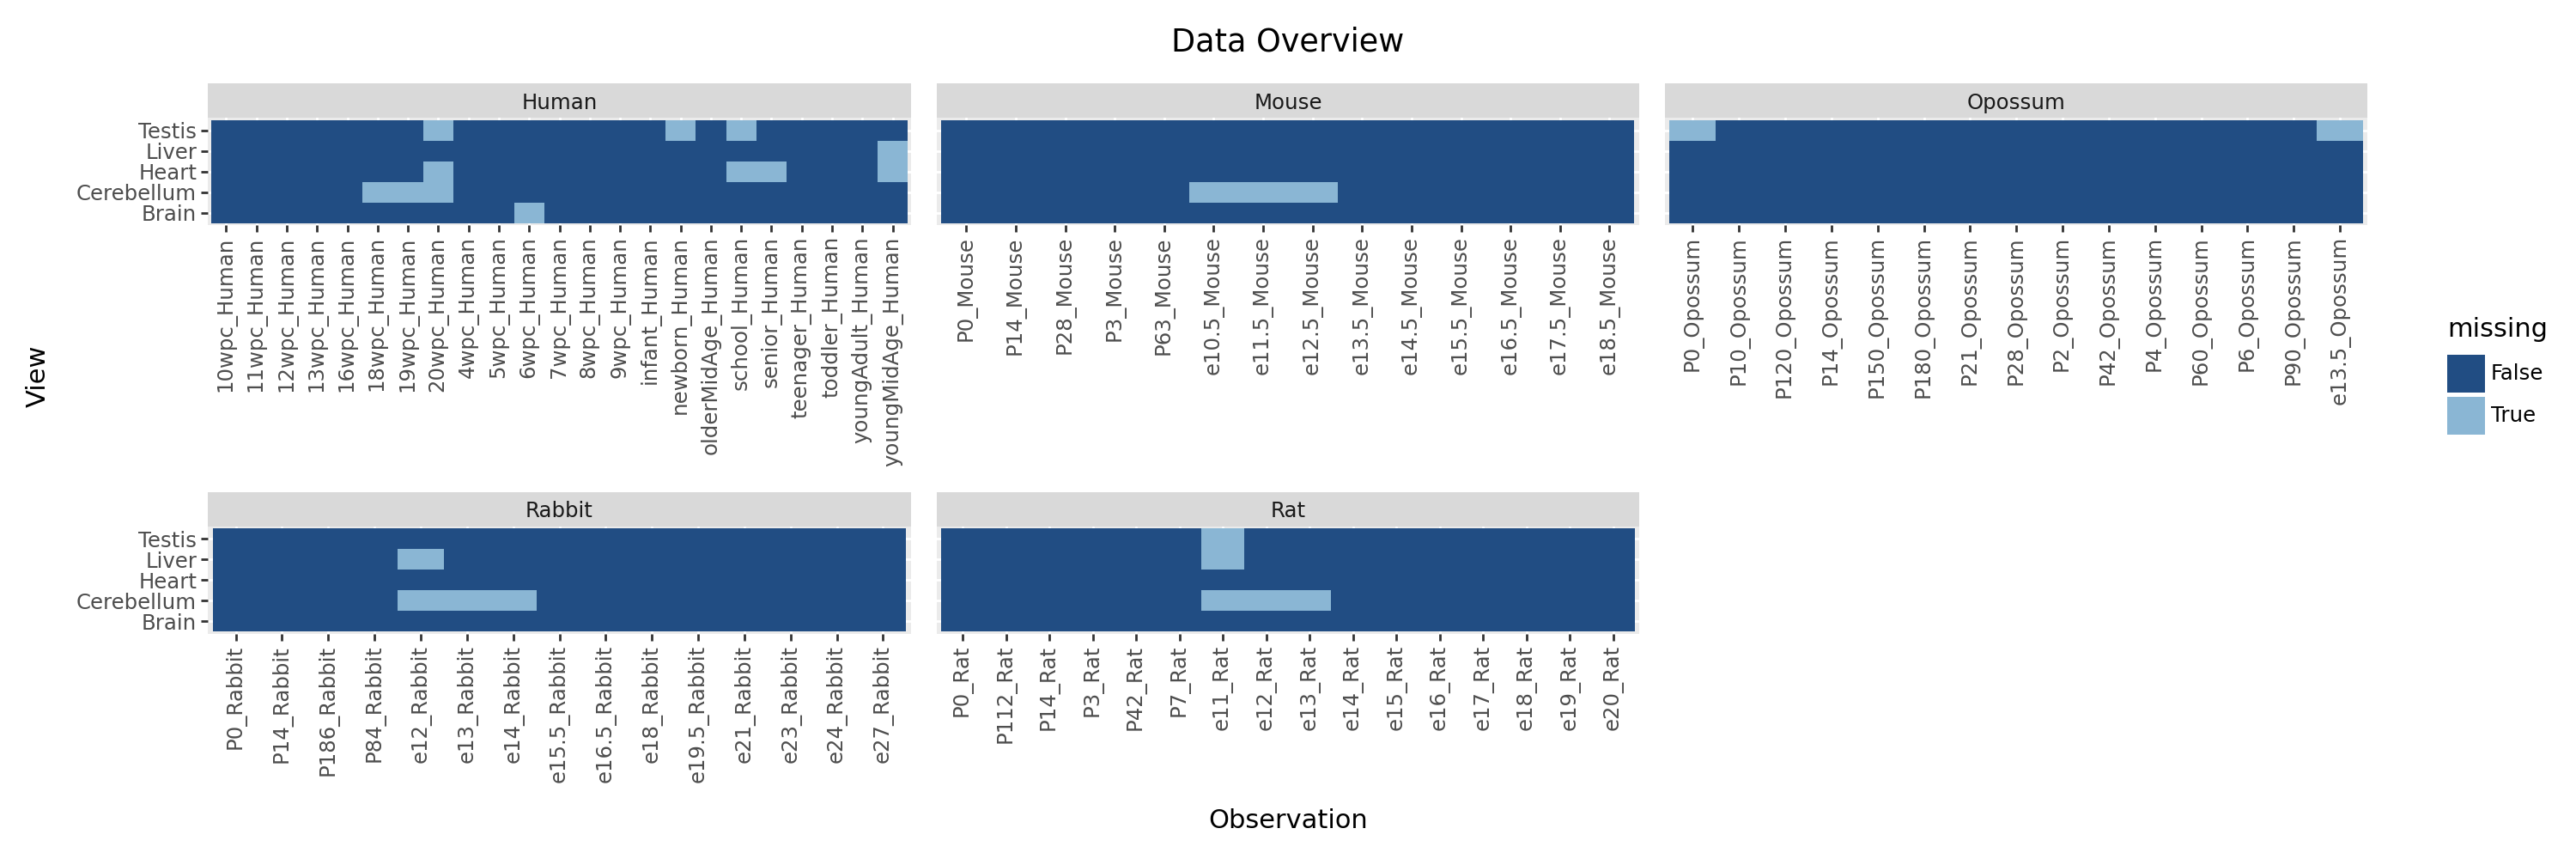

2024-10-30 11:45:52 | prismo.prismo | INFO | Initializing factors using `random` method...
INFO:prismo.prismo:Initializing factors using `random` method...
2024-10-30 11:45:52 | prismo.prismo | INFO | Decaying learning rate over 10000 iterations.
INFO:prismo.prismo:Decaying learning rate over 10000 iterations.
2024-10-30 11:45:52 | prismo.prismo | INFO | Setting training seed to `2410301145`.
INFO:prismo.prismo:Setting training seed to `2410301145`.
2024-10-30 11:45:52 | prismo.prismo | INFO | Cleaning parameter store.
INFO:prismo.prismo:Cleaning parameter store.
2024-10-30 11:45:52 | prismo.prismo | INFO | Epoch:       0 | Time:       0.23s | Loss:   76114.88
INFO:prismo.prismo:Epoch:       0 | Time:       0.23s | Loss:   76114.88
2024-10-30 11:46:06 | prismo.prismo | INFO | Epoch:     100 | Time:      13.68s | Loss:   74892.27
INFO:prismo.prismo:Epoch:     100 | Time:      13.68s | Loss:   74892.27
2024-10-30 11:46:19 | prismo.prismo | INFO | Epoch:     200 | Time:      26.86s | Loss

- Model saved to model_20241030_115313/model.pkl
- Parameters saved to model_20241030_115313/params.save


In [39]:
model = PRISMO()
model.fit(
    data,
    DataOptions(covariates_obs_key="time"),
    ModelOptions(n_factors=5, factor_prior="GP", weight_prior="Horseshoe"),
    TrainingOptions(device="cuda"),
    SmoothOptions(warp_groups=["Human", "Mouse", "Rat", "Rabbit", "Opossum"])
)

In [40]:
model = load_model("trained_model")

Model loaded from trained_model/model.pkl
Parameters loaded from trained_model/params.save


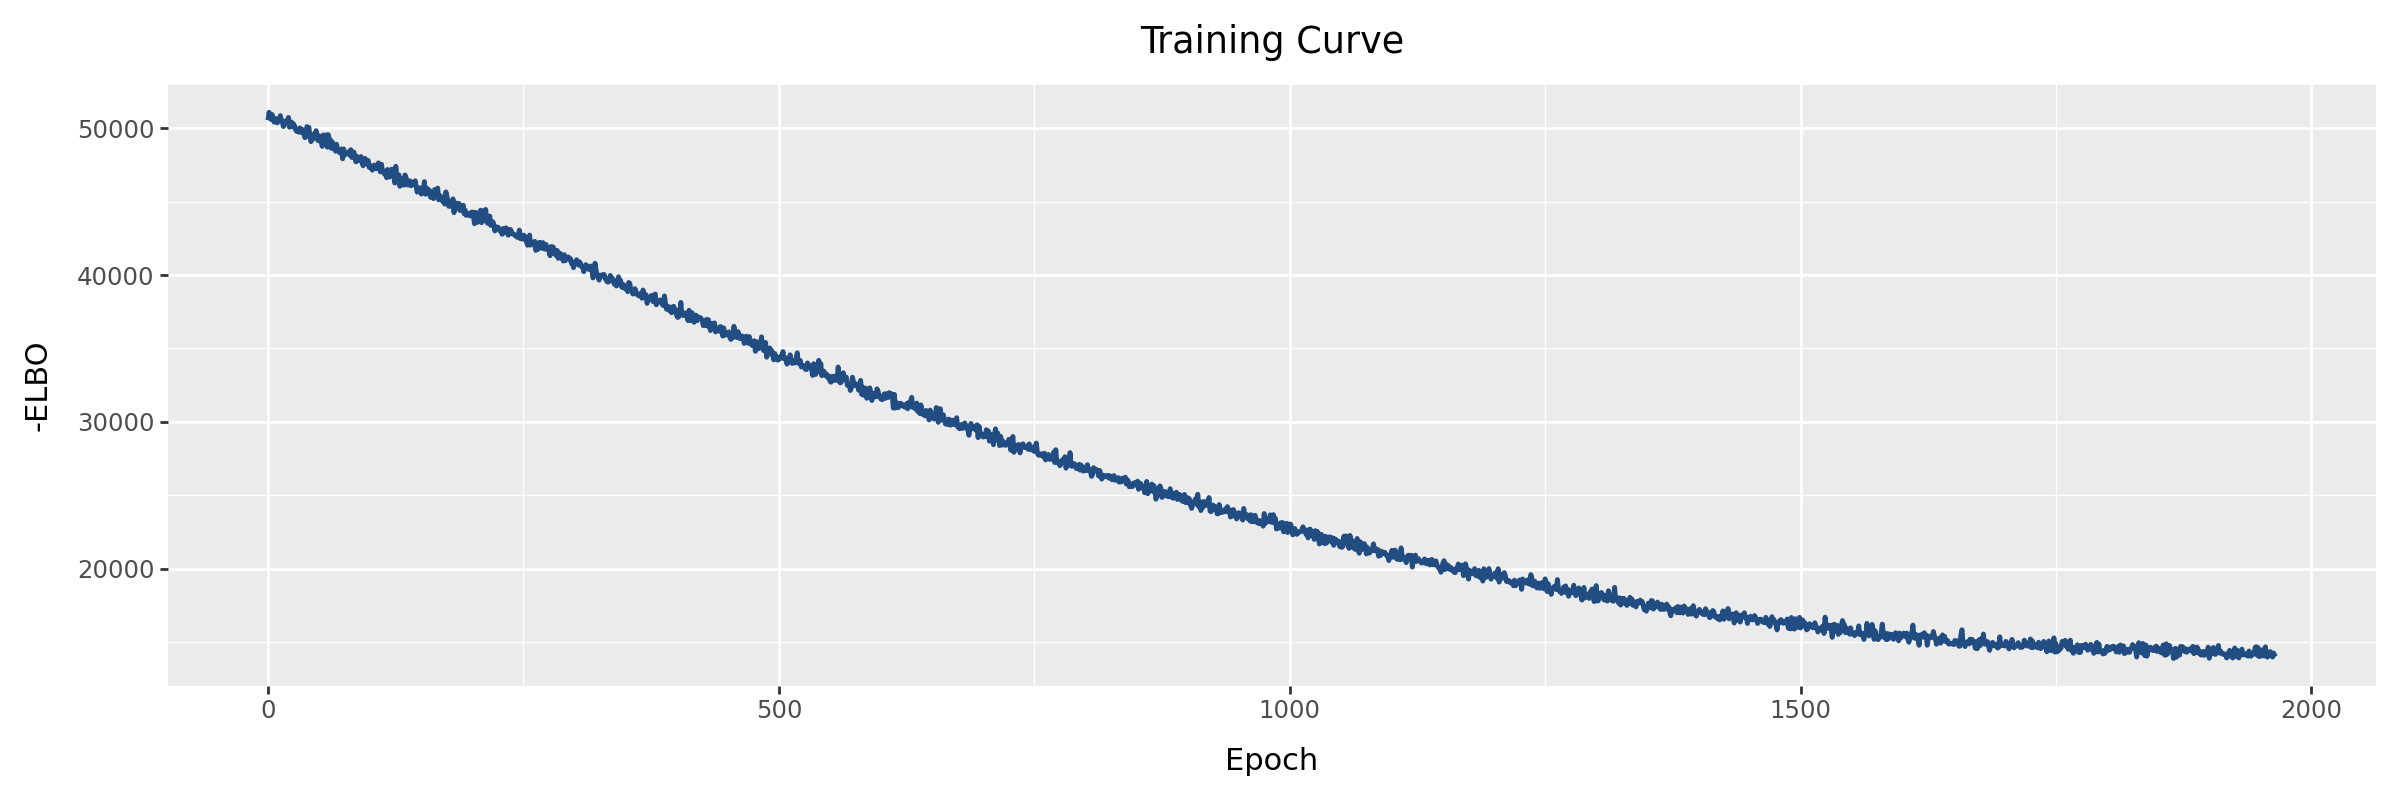

In [41]:
plot_training_curve(model)

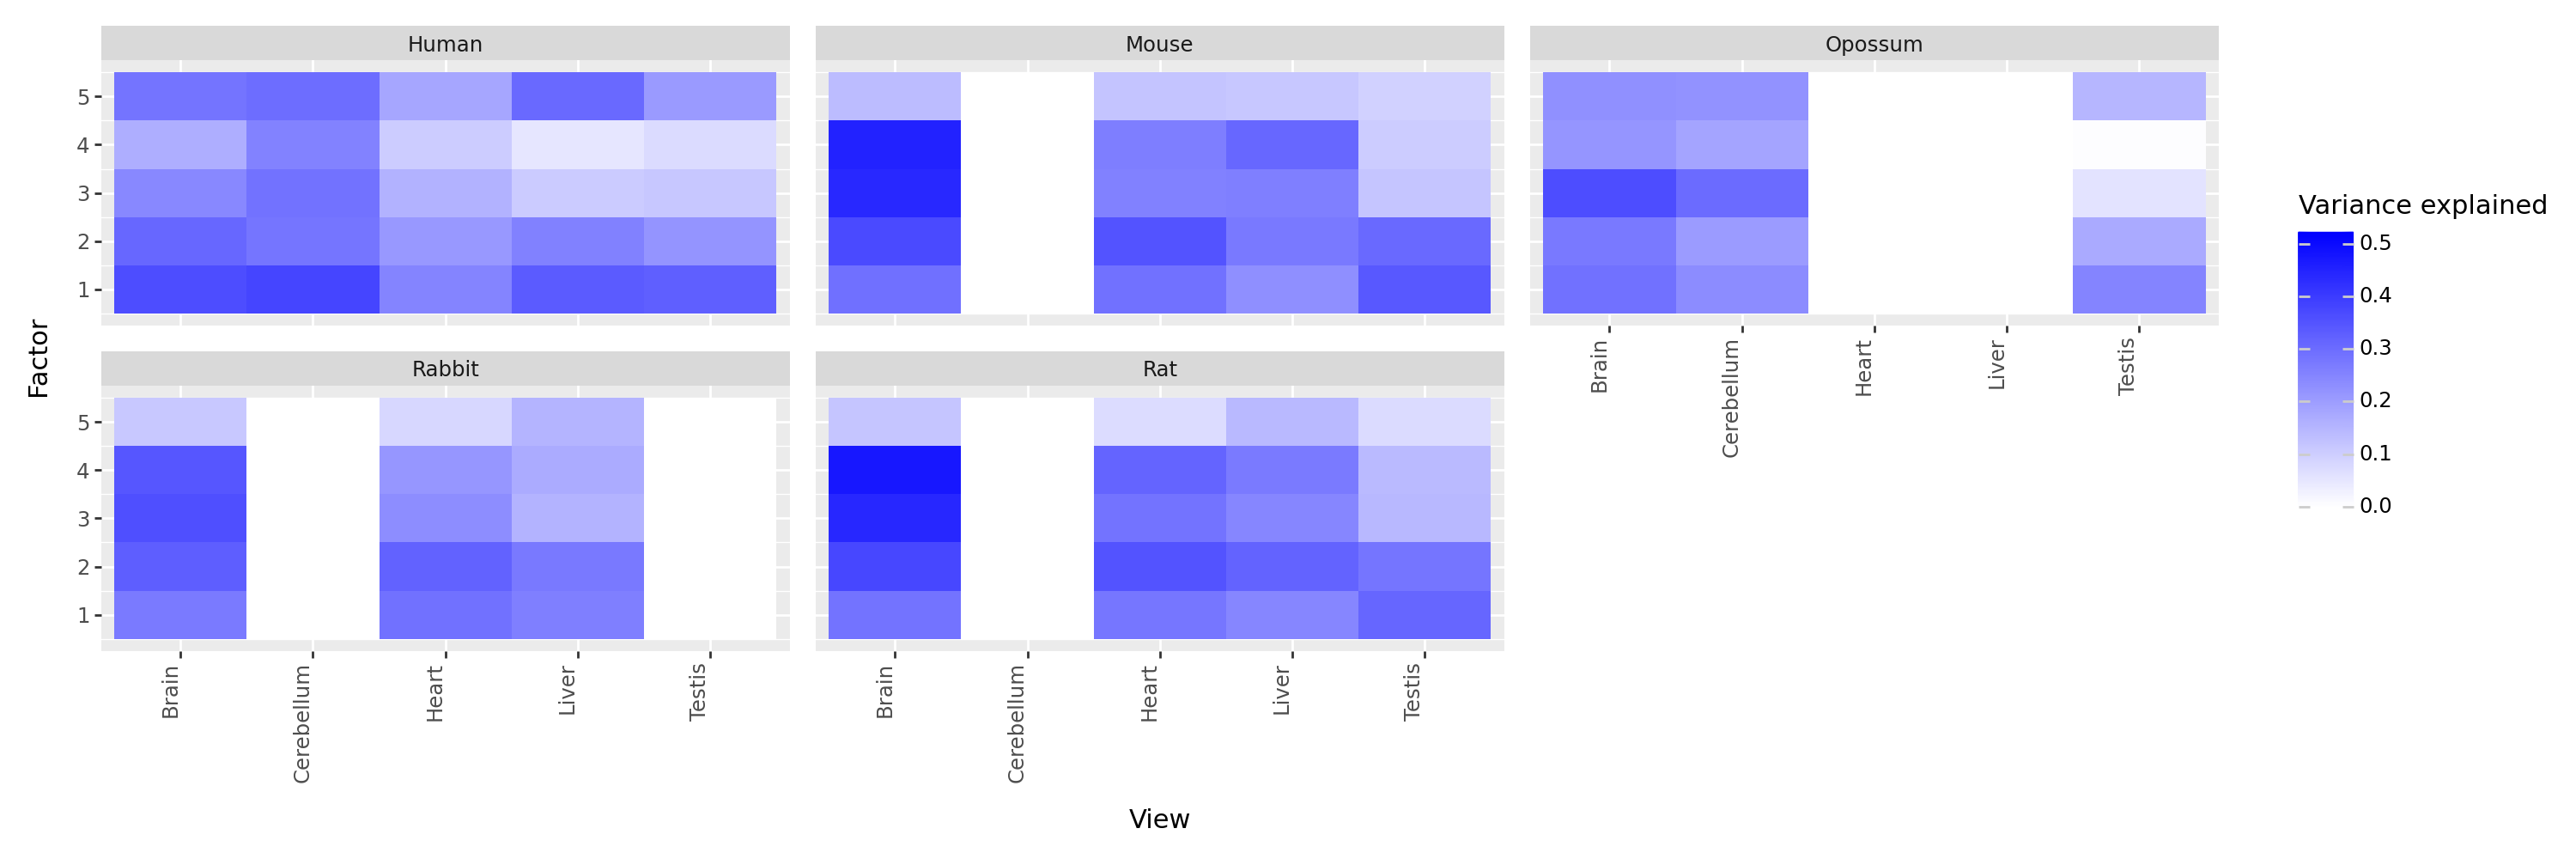

In [42]:
plot_variance_explained(model, group_by="group")

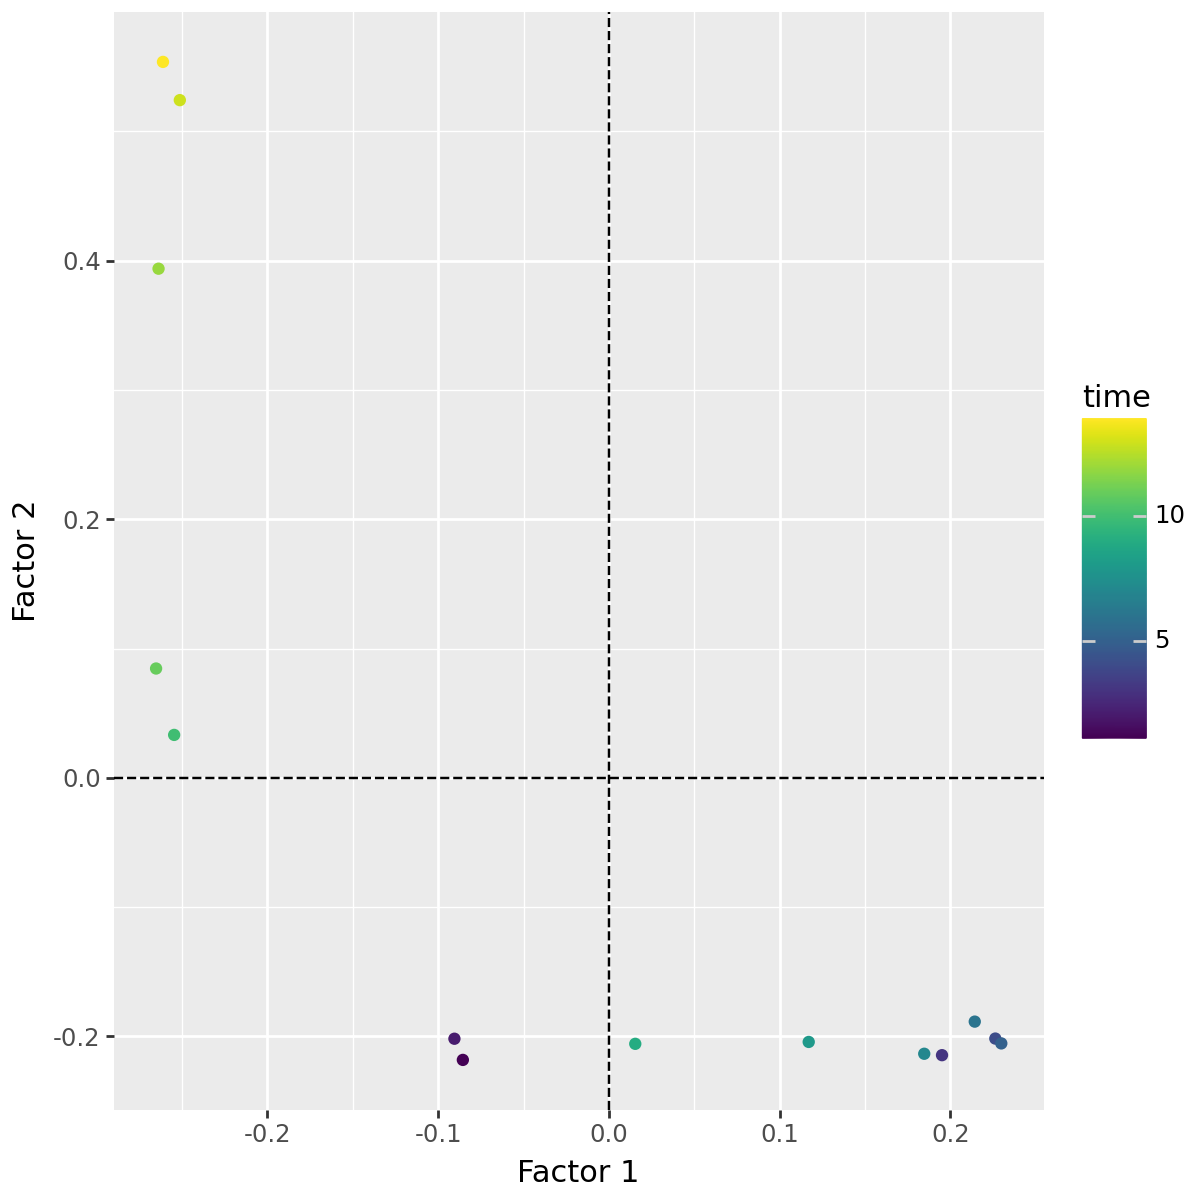

In [45]:
plot_factors_scatter(model, 1, 2, color="time", group="Mouse")